# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Imports

import pickle
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load pickled data

training_file = "C:/_Data/traffic-signs-data/train.p"
validation_file="C:/_Data/traffic-signs-data/valid.p"
testing_file = "C:/_Data/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train = train['features'], train['labels']
X_valid_raw, y_valid = valid['features'], valid['labels']
X_test_raw, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
print("Number of training examples =", len(y_train))
print("Number of validation examples =", len(y_valid))
print("Number of testing examples =", len(y_test))
print("Image data shape =", X_train_raw[0].shape)
print("Number of classes =", len(set(y_train)))

names_csv = pd.read_csv('signnames.csv')
names = dict(names_csv['SignName'])
print(names)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals cro

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

(array([  30.,  240.,  240.,  150.,  210.,  210.,   60.,  150.,  150.,
         150.,  210.,  150.,  210.,  240.,   90.,   90.,   60.,  120.,
         120.,   30.,   60.,   60.,   60.,   60.,   30.,  150.,   60.,
          30.,   60.,   30.,   60.,   90.,   30.,   90.,   60.,  120.,
          60.,   30.,  210.,   30.,   60.,   30.,   30.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

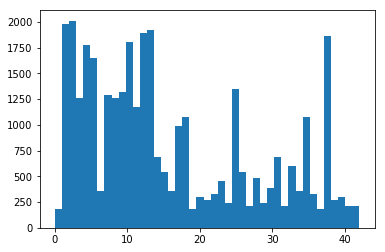

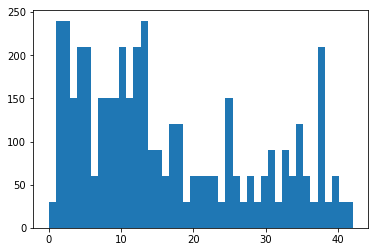

In [4]:
# Distribution of classes
plt.figure()
plt.hist(y_train, bins=43)

plt.figure()
plt.hist(y_valid, bins=43)

Speed limit (60km/h)


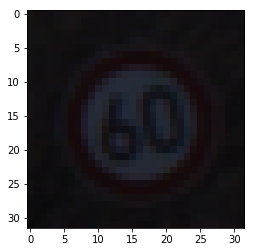

In [5]:
# Sample images

index = random.randint(0, len(X_train_raw))
image = X_train_raw[index].squeeze()
print(names[y_train[index]])

plt.figure()
plt.imshow(image)

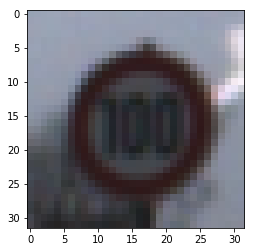

In [6]:
# Sample images from a particular class

class_ix = 7
X_class = X_train_raw[y_train==class_ix]
index = random.randint(0, len(X_class))
image = X_class[index].squeeze()
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

def img_norm(image):
    x = image * 1.0
    x -= np.mean(x)
    x /= np.std(x)
    return x

def img_norm_ycrcb(image):
    x = image * 1.0
    x[:,:,0] = x[:,:,0] - np.mean(x[:,:,0])
    x[:,:,0] = x[:,:,0] / np.std(x[:,:,0])
    x[:,:,1] = (x[:,:,1]-128)/128.0
    x[:,:,2] = (x[:,:,2]-128)/128.0
    return x

def gray2x(image):
    x = np.zeros([32,32,1])
    x[:,:,0] = image * 1.0
    return x

def preprocess(image):
#     return img_norm(image)

#     ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
#     return img_norm_ycrcb(ycrcb)

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    clahe = CLAHE.apply(gray)
    return img_norm(gray2x(clahe))

def imshow_processed(image_norm):
    plt.imshow(np.clip(image_norm.squeeze() / 3, -0.5, 0.5) + 0.5, cmap="gray")

In [8]:
X_train = np.array([preprocess(x) for x in X_train_raw])
X_valid = np.array([preprocess(x) for x in X_valid_raw])
X_test = np.array([preprocess(x) for x in X_test_raw])

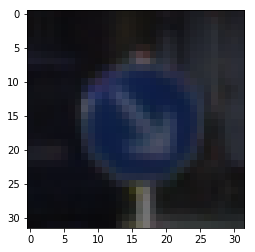

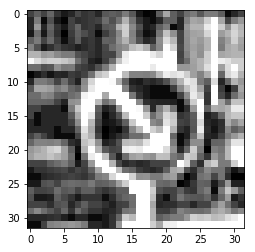

In [10]:
index = random.randint(0, len(X_train))

plt.figure()
plt.imshow(X_train_raw[index])

plt.figure()
imshow_processed(X_train[index])

### Model Architecture

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x, input_depth=3, output_classes=43):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, output_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(output_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
EPOCHS = 50
BATCH_SIZE = 128
ADAM_LR = 0.001
IMAGE_DEPTH = X_train[0].shape[2]
SAVE_AS = 'lenet_clahe50'

# Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, IMAGE_DEPTH))
logits = LeNet(x, input_depth=IMAGE_DEPTH)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = ADAM_LR)
training_operation = optimizer.minimize(loss_operation)

# Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# TRAIN

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_shuff, y_train_shuff = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuff[offset:end], y_train_shuff[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} : Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    tf.train.Saver().save(sess, 'models/' + SAVE_AS)
    print("Model saved")

Training...

EPOCH 1 : Accuracy = 0.881
EPOCH 2 : Accuracy = 0.917
EPOCH 3 : Accuracy = 0.936
EPOCH 4 : Accuracy = 0.936
EPOCH 5 : Accuracy = 0.937
EPOCH 6 : Accuracy = 0.951
EPOCH 7 : Accuracy = 0.937
EPOCH 8 : Accuracy = 0.941
EPOCH 9 : Accuracy = 0.943
EPOCH 10 : Accuracy = 0.938
EPOCH 11 : Accuracy = 0.949
EPOCH 12 : Accuracy = 0.950
EPOCH 13 : Accuracy = 0.944
EPOCH 14 : Accuracy = 0.952
EPOCH 15 : Accuracy = 0.957
EPOCH 16 : Accuracy = 0.949
EPOCH 17 : Accuracy = 0.945
EPOCH 18 : Accuracy = 0.944
EPOCH 19 : Accuracy = 0.953
EPOCH 20 : Accuracy = 0.943
EPOCH 21 : Accuracy = 0.955
EPOCH 22 : Accuracy = 0.955
EPOCH 23 : Accuracy = 0.962
EPOCH 24 : Accuracy = 0.947
EPOCH 25 : Accuracy = 0.946
EPOCH 26 : Accuracy = 0.948
EPOCH 27 : Accuracy = 0.949
EPOCH 28 : Accuracy = 0.958
EPOCH 29 : Accuracy = 0.963
EPOCH 30 : Accuracy = 0.937
EPOCH 31 : Accuracy = 0.957
EPOCH 32 : Accuracy = 0.959
EPOCH 33 : Accuracy = 0.949
EPOCH 34 : Accuracy = 0.956
EPOCH 35 : Accuracy = 0.958
EPOCH 36 : Accur

### Inspect misclassified images

In [15]:
sample_size = 100
indexes = np.random.randint(len(y_valid), size=sample_size)
batch_x, batch_y, batch_raw = X_valid[indexes], y_valid[indexes], X_valid_raw[indexes]

with tf.Session() as sess:
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('models'))
    topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: batch_x, y: batch_y})

INFO:tensorflow:Restoring parameters from models\lenet_clahe50


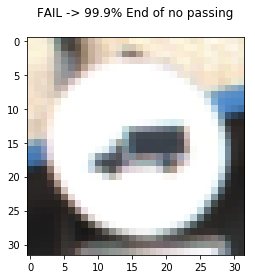

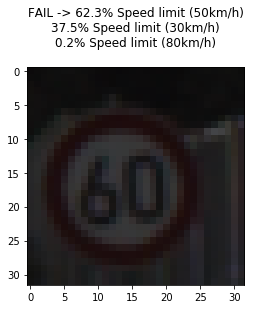

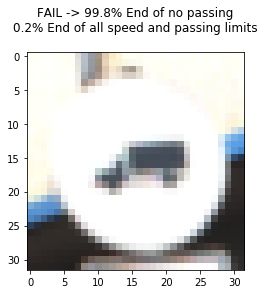

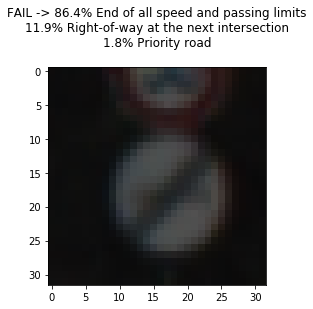

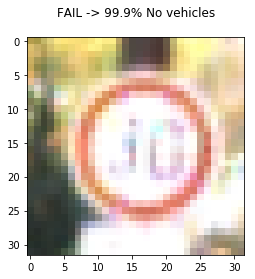

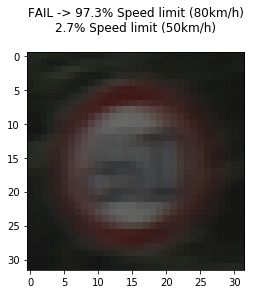

In [16]:
def describe_topk(topk, i, min_prob=0.001):
    probs = topk.values[i]
    categories = topk.indices[i]
    desc = ''
    for j in range(len(probs)):
        if probs[j] > min_prob:
            desc += '{:.1f}% {}\n'.format(probs[j]*100, names[categories[j]])
    return desc

for i in range(len(batch_x)):
    correct = batch_y[i] == topk.indices[i][0]
    y_name = names[batch_y[i]]
    topk_desc = describe_topk(topk, i)
    if correct:
        continue
    plt.figure()
    plt.title(('' if correct else 'FAIL -> ') + topk_desc)
    plt.imshow(batch_raw[i])

### Evaluate on Test set

In [17]:
with tf.Session() as sess:
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('models'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from models\lenet_clahe50
Test Accuracy = 0.953


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

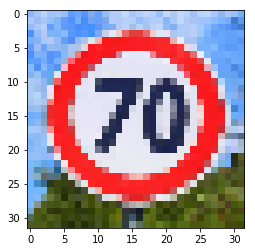

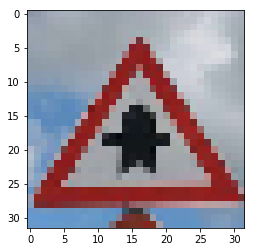

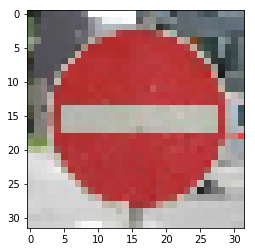

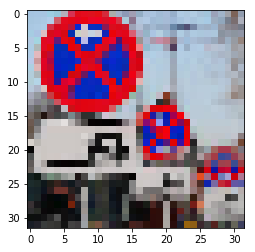

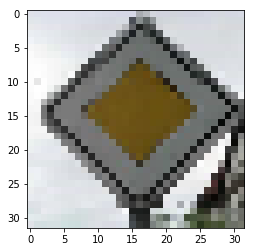

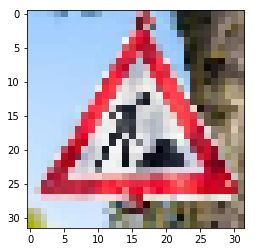

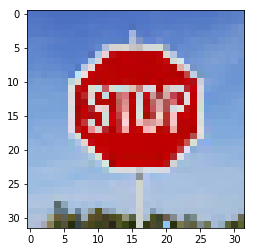

In [18]:
# Load and resize to 32x32. Images are already cropped to square aspect ratio

new_images = []

for fname in os.listdir('new_images'):
    image = mpimg.imread('new_images/' + fname)
    image = cv2.resize(image, (32, 32))
    new_images.append(image)
    plt.figure()
    plt.imshow(image)

### Predict the Sign Type for Each Image

In [19]:
batch_x = np.array([preprocess(x) for x in new_images])
batch_y = np.zeros(len(batch_x)) # Not used

with tf.Session() as sess:
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('models'))
    topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: batch_x, y: batch_y})

INFO:tensorflow:Restoring parameters from models\lenet_clahe50


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

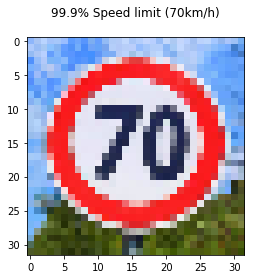

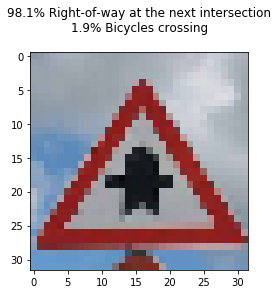

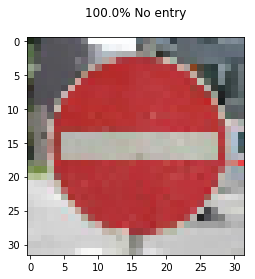

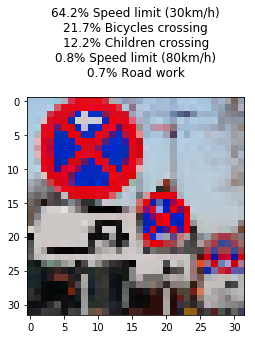

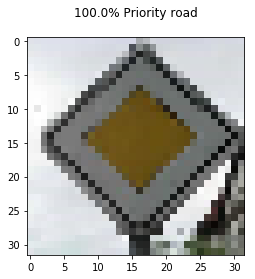

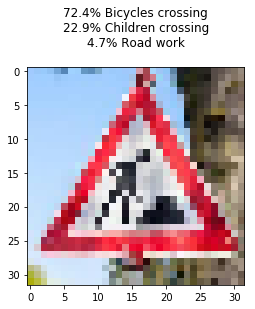

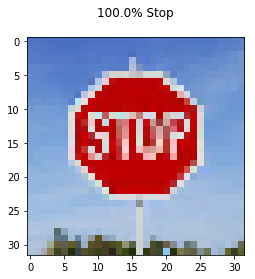

In [20]:
for i in range(len(batch_x)):
    topk_desc = describe_topk(topk, i)
    plt.figure()
    plt.title(topk_desc)
    plt.imshow(new_images[i])

### Analyze Performance

In [4]:
# 6/7 classified correctly => 86% accuracy

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.